In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to include channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.9166 - loss: 0.2755 - val_accuracy: 0.9849 - val_loss: 0.0488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9883 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9908 - loss: 0.0274 - val_accuracy: 0.9921 - val_loss: 0.0247
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9904 - val_loss: 0.0285
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9910 - val_loss: 0.0284


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


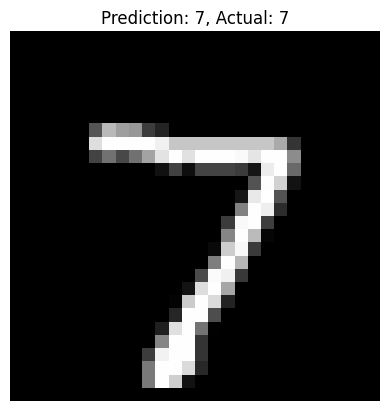

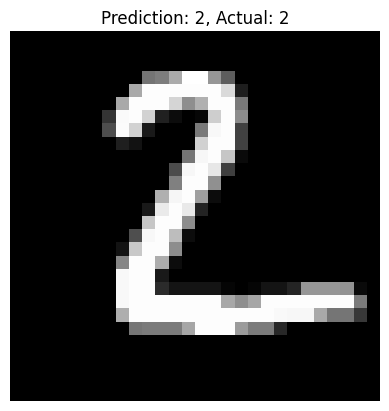

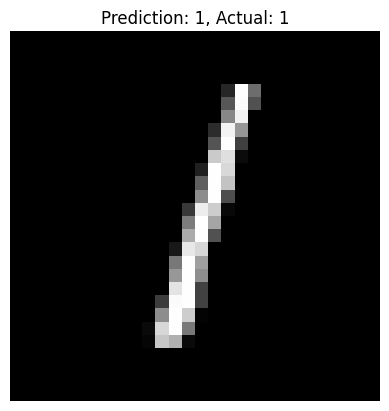

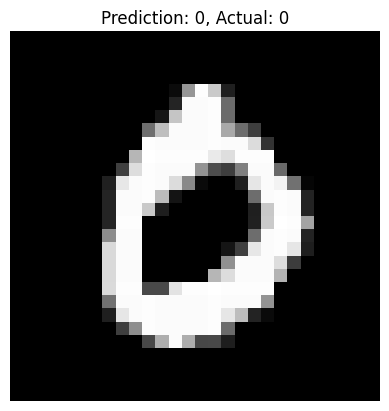

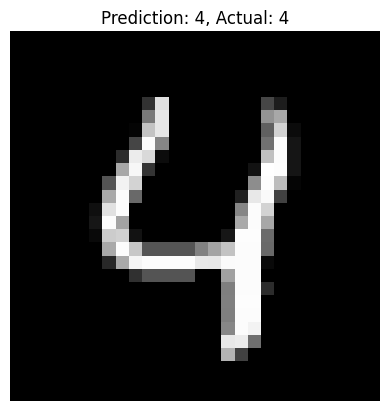

In [5]:
predictions = model.predict(x_test)

# Show 5 test images with predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
